In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Read in the data
df = pd.read_csv('sleep_health_and_lifestyle_dataset.csv')

# Drop data we're not using
data = df.copy().drop(['Person ID', 'Occupation', 'Sleep Disorder', 'Blood Pressure'], axis = 1)

# Rename columns
data.rename(columns = {'BMI Category': 'BMI', 'Quality of Sleep': 'Sleep Quality', 'Physical Activity Level': 'Physical Activity'}, inplace = True)

# Convert BMI normal weight -> normal
data['BMI'] = np.where(data['BMI'] == 'Normal Weight', 'Normal', data['BMI'])


# Convert categorical data to numerical data
# Convert BMI strings to numbers
data['BMI'].replace(["Normal", "Overweight", "Obese"], [0, 1, 2], inplace=True)

# Convert Gender Strings to Numbers: Male to 1 and Female to 0
data['Gender'] = np.where(data['Gender'] == 'Male', 1, 0)

In [92]:
# Consider what predictor variables we want to use
sleepDuration = data['Sleep Duration']
sleepQuality = data['Sleep Quality']
stressLevel = data['Stress Level']
# bmi = data['BMI']

# Create a dataframe with the predictor variables
pred = pd.DataFrame(data={'Sleep Duration': sleepDuration, 'Sleep Quality': sleepQuality, 'Stress Level': stressLevel})

# Drop class we want to predict: Stress Level
X = pred.copy().drop(['Stress Level'], axis=1)
y = pred['Stress Level']

In [93]:
# linear regression model

# mseTrainSum, mseTestSum, r2TrainSum, r2TestSum = 0, 0, 0, 0
# epochs = 100

# for i in range(1, epochs+1):

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_test.shape, y_test.shape)

# Create the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions using the testing set
y_trainPred = lr.predict(X_train)
y_testPred = lr.predict(X_test)

# Round the predictions to the nearest integer
y_trainPred = np.round(y_trainPred)
y_testPred = np.round(y_testPred)

# # Calculate MSE & R^2
# mseTrain, mseTest = mean_squared_error(y_train, y_trainPred), mean_squared_error(y_test, y_testPred)
# r2Train, r2Test = r2_score(y_train, y_trainPred), r2_score(y_test, y_testPred)

#     # Add to the average
#     mseTrainSum += mseTrain
#     mseTestSum += mseTest
#     r2TrainSum += r2Train
#     r2TestSum += r2Test

# # Print results
# print("Results for Linear Regression Model")
# print(f'\nAverage Train MSE: {mseTrainSum / epochs}')
# print(f'Average Train R^2: {r2TrainSum / epochs }\n')
# print(f'Average Test MSE: {mseTestSum / epochs}')
# print(f'Average Test R^2: {r2TestSum / epochs}')

(75, 2) (75,)


In [94]:
from sklearn.model_selection import cross_val_score

# Calculate Cross Validation Scores for 15 folds
r2Train = cross_val_score(lr, X_train, y_train, cv=15, scoring='r2')
mseTrain = -1 * cross_val_score(lr, X_train, y_train, cv=15, scoring='neg_mean_squared_error')
r2Test = cross_val_score(lr, X_test, y_test, cv=15, scoring='r2')
mseTest = -1 * cross_val_score(lr, X_test, y_test, cv=15, scoring='neg_mean_squared_error')

print(f'Mean Squared Error Train: {mseTrain}\n')
print(f'R^2 Train: {r2Train}\n')

print(f'Average Mean Squared Error Train: {np.mean(mseTrain)}')
print(f'Average R^2 Train: {np.mean(r2Train)}\n')

print(f'Mean Squared Error Test: {mseTest}\n')
print(f'R^2 Test: {r2Test}\n')

print(f'Average Mean Squared Error Test: {np.mean(mseTest)}')
print(f'Average R^2 Test: {np.mean(r2Test)}')

Mean Squared Error Train: [0.41331574 0.73382633 0.91166277 0.30097747 0.52934185 0.3344174
 0.83960333 0.19183088 0.53460475 0.40727754 0.85927889 0.63983071
 0.87181766 1.02176117 0.41461626]

R^2 Train: [0.85238724 0.77678287 0.70084897 0.918874   0.86170037 0.88255754
 0.77595642 0.94269428 0.77608178 0.85697014 0.58836939 0.72888529
 0.69807181 0.63377736 0.87379724]

Average Mean Squared Error Train: 0.600277517806809
Average R^2 Train: 0.7911836452625113

Mean Squared Error Test: [1.20551622 0.17611578 0.89651265 0.9399247  1.40947549 0.95426925
 0.17383629 0.33485    0.79595675 1.13954655 0.31781667 0.24522722
 1.09901637 0.45363239 0.24337701]

R^2 Test: [ 0.66513438  0.95107895 -0.40080102 -2.91635293  0.55953891  0.74620499
  0.83284972  0.87316288  0.41473768  0.38068122  0.92360176  0.86066635
 -0.05674651  0.85077882  0.92925087]

Average Mean Squared Error Test: 0.6923382233918897
Average R^2 Test: 0.37425240509383284


     Sleep Duration  Sleep Quality
79              6.0              6
9               7.8              7
52              6.0              6
36              6.1              6
40              7.7              7
..              ...            ...
172             7.7              8
300             8.5              9
138             7.1              8
311             6.6              7
359             8.1              9

[299 rows x 2 columns]


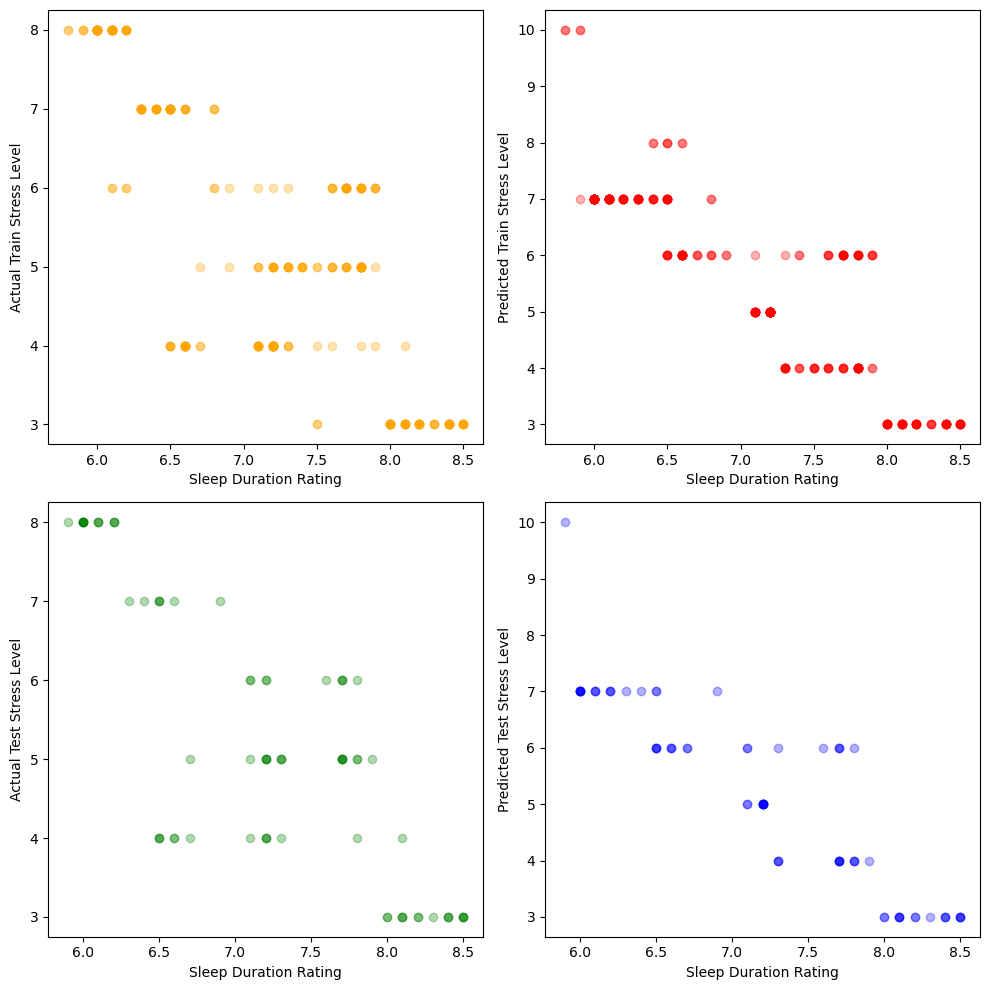

In [95]:
# Create scatterplots for train sleep duration & predicted train stress level

fig, axes = plt.subplots(2,2,figsize=(10,10))
axes = axes.flatten()

print(X_train)

# Plot Train Data vs Train Predictions
axes[0].scatter(x=X_train['Sleep Duration'], y=y_train, color='orange', alpha=0.3)
axes[0].set(xlabel='Sleep Duration Rating', ylabel='Actual Train Stress Level')
axes[1].scatter(x=X_train['Sleep Duration'], y=y_trainPred, color='red', alpha=0.3)
axes[1].set(xlabel='Sleep Duration Rating', ylabel='Predicted Train Stress Level')

# Plot Test Data vs Test Predictions
axes[2].scatter(x=X_test['Sleep Duration'], y=y_test, color='green', alpha=0.3)
axes[2].set(xlabel='Sleep Duration Rating', ylabel='Actual Test Stress Level')
axes[3].scatter(x=X_test['Sleep Duration'], y=y_testPred, color='blue', alpha=0.3)
axes[3].set(xlabel='Sleep Duration Rating', ylabel='Predicted Test Stress Level')
plt.tight_layout()
plt.show()

MLR Training Classification Report:
               precision    recall  f1-score   support

           3       0.96      0.96      0.96        54
           4       0.64      0.90      0.75        60
           5       0.83      0.54      0.65        54
           6       0.88      0.79      0.83        38
           7       1.00      0.88      0.94        34
           8       0.95      1.00      0.98        59

    accuracy                           0.85       299
   macro avg       0.88      0.85      0.85       299
weighted avg       0.87      0.85      0.85       299

Accuracy: 0.8494983277591973

MLR Testing Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        17
           4       0.56      0.90      0.69        10
           5       0.90      0.69      0.78        13
           6       0.86      0.75      0.80         8
           7       1.00      0.81      0.90        16
           8       0.92      

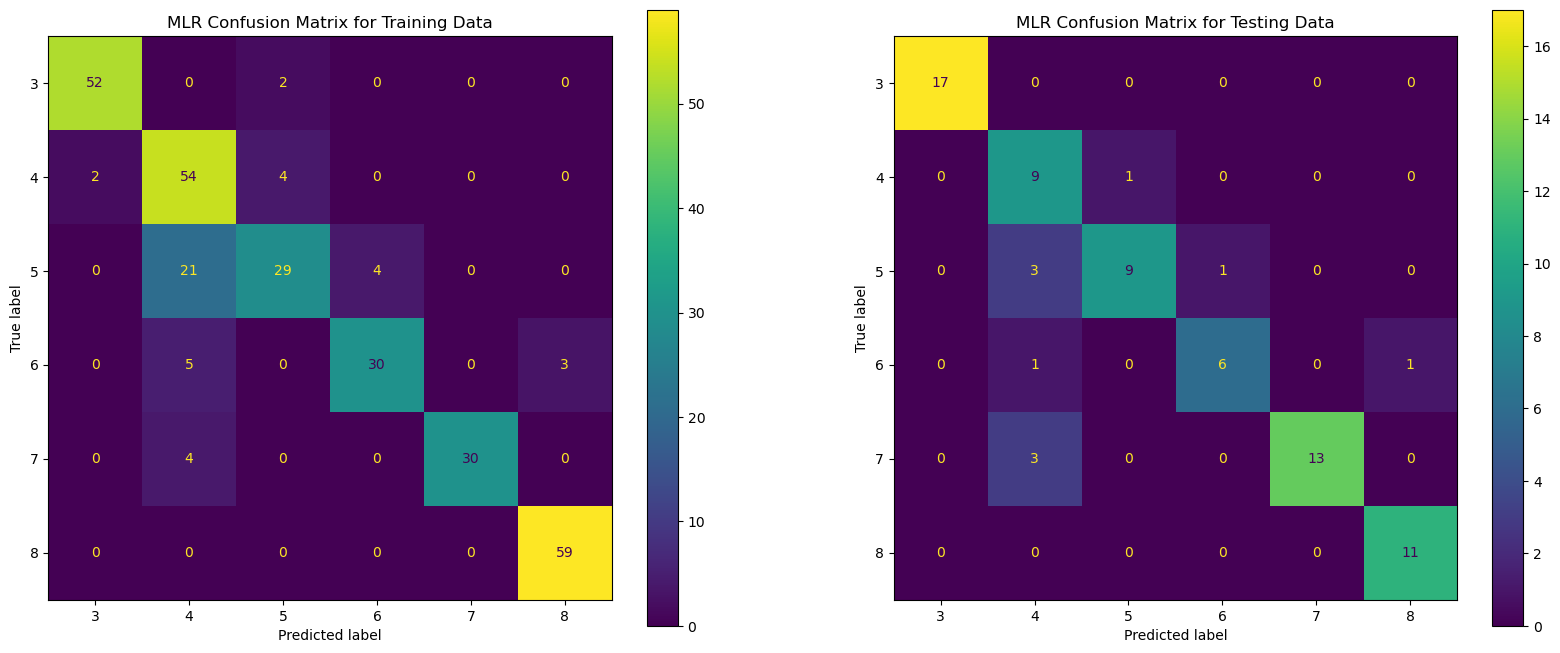

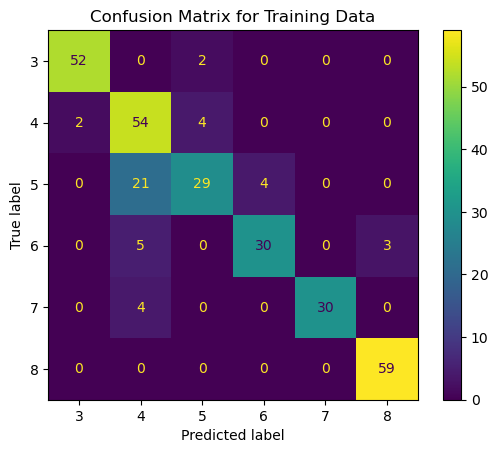

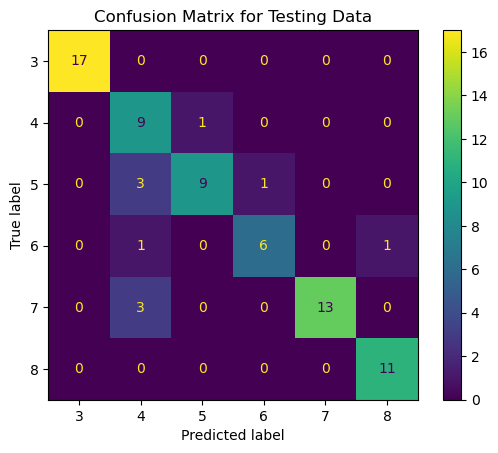

In [96]:
# logistic regression model

# Get all y labels
y_labels = y.value_counts().index.tolist()

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# multinomial regression with cross validation for 10 folds
multi_logreg = LogisticRegressionCV(cv=10, multi_class='multinomial', solver='lbfgs', max_iter=1000, refit=True)
multi_logreg.fit(X_train, y_train)

# use multinomial logistic regression to predict on train and test sets
y_trainPredmulti = multi_logreg.predict(X_train)
y_testPredmulti = multi_logreg.predict(X_test)

# display accuracy for train and test sets
print('MLR Training Classification Report:\n',
      classification_report(y_train, y_trainPredmulti))
print(f'Accuracy: {accuracy_score(y_train, y_trainPredmulti)}\n')

print('MLR Testing Classification Report:\n',
      classification_report(y_test, y_testPredmulti))
print(f'Accuracy: {accuracy_score(y_test, y_testPredmulti)}')

# create confusion matrix for train and test sets
conf_mat_multi_train = confusion_matrix(y_train, y_trainPredmulti, labels=y_labels)
conf_mat_multi_test = confusion_matrix(y_test, y_testPredmulti, labels=y_labels)

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredmulti, ax=axes[0])
disptrain.plot()
axes[0].set_title("MLR Confusion Matrix for Training Data")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredmulti, ax=axes[1])
disptest.plot()
axes[1].set_title("MLR Confusion Matrix for Testing Data")
plt.title("Confusion Matrix for Testing Data")
plt.show()

NB Classification Train Report:
               precision    recall  f1-score   support

           3       0.98      0.96      0.97        56
           4       0.69      0.45      0.55        60
           5       0.60      0.82      0.69        56
           6       0.85      0.76      0.81        38
           7       0.85      0.90      0.88        39
           8       0.94      1.00      0.97        50

    accuracy                           0.81       299
   macro avg       0.82      0.82      0.81       299
weighted avg       0.81      0.81      0.80       299

Train Accuracy: 0.8060200668896321

NB Classification Test Report:
               precision    recall  f1-score   support

           3       0.94      1.00      0.97        15
           4       0.40      0.20      0.27        10
           5       0.62      0.91      0.74        11
           6       1.00      0.75      0.86         8
           7       0.82      0.82      0.82        11
           8       0.95      1.

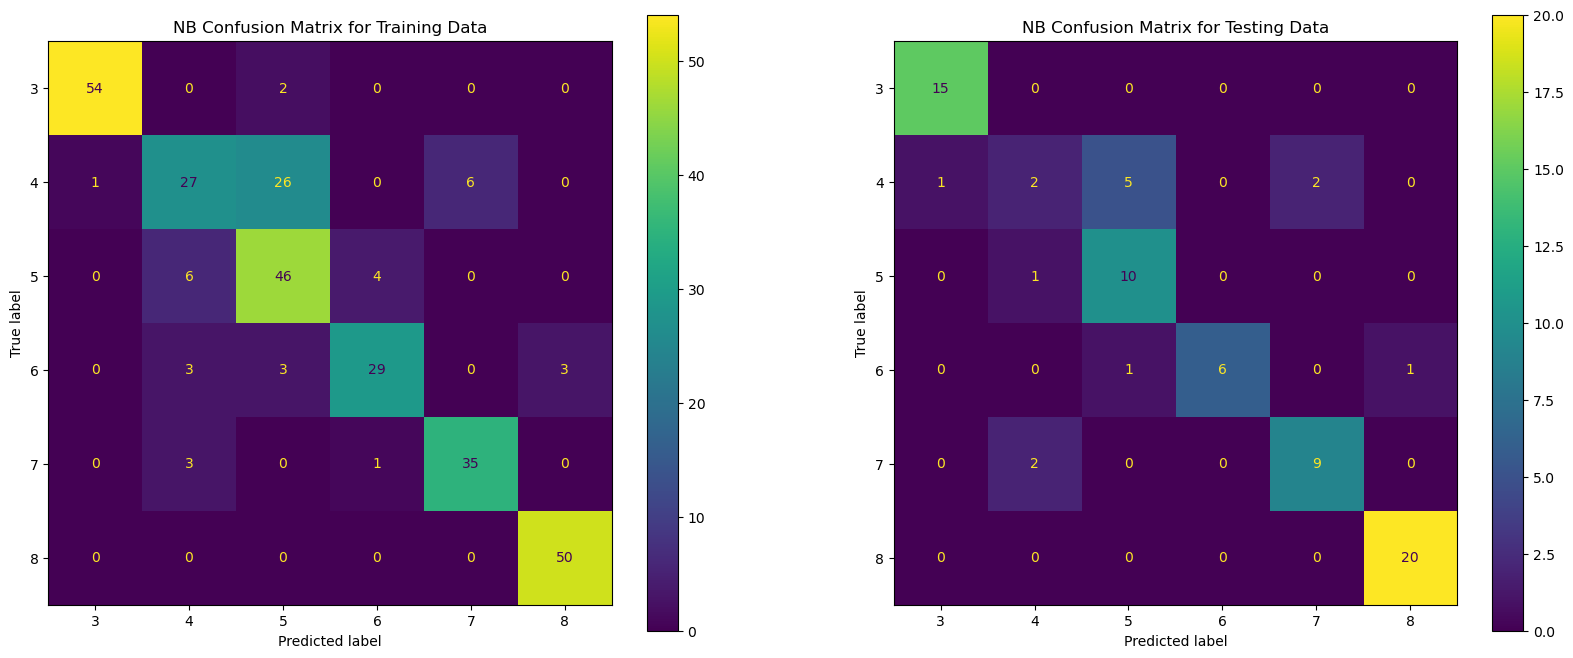

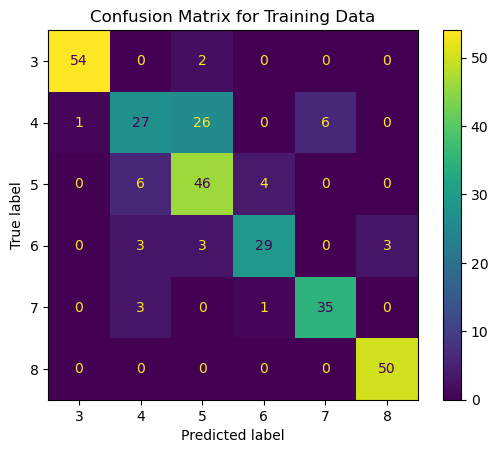

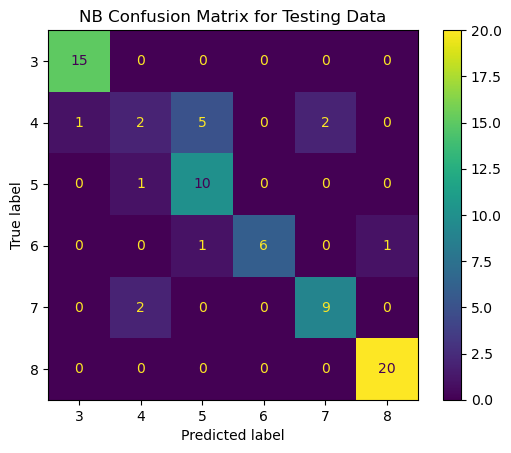

In [97]:
# naive bayes classification

# Get all y labels
y_labels = y.value_counts().index.tolist()

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set up Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# use Naive Bayes to predict on train and test sets
y_trainPredNB = gnb.predict(X_train)
y_testPredNB = gnb.predict(X_test)

# display accuracy for train and test sets
print('NB Classification Train Report:\n',
      classification_report(y_train, y_trainPredNB))
print(f'Train Accuracy: {accuracy_score(y_train, y_trainPredNB)}\n')

print('NB Classification Test Report:\n',
      classification_report(y_test, y_testPredNB))
print(f'Test Accuracy: {accuracy_score(y_test, y_testPredNB)}')

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredNB, ax=axes[0])
disptrain.plot()
axes[0].set_title("NB Confusion Matrix for Training Data")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredNB, ax=axes[1])
disptest.plot()
axes[1].set_title("NB Confusion Matrix for Testing Data")
plt.title("NB Confusion Matrix for Testing Data")
plt.show()

SVM Classification Train Report:
               precision    recall  f1-score   support

           3       0.98      0.97      0.98        61
           4       0.60      0.89      0.72        57
           5       0.79      0.54      0.64        50
           6       0.90      0.76      0.82        37
           7       1.00      0.83      0.91        42
           8       0.96      1.00      0.98        52

    accuracy                           0.84       299
   macro avg       0.87      0.83      0.84       299
weighted avg       0.87      0.84      0.84       299

Accuracy Train: 0.842809364548495

SVM Classification Test Report:
               precision    recall  f1-score   support

           3       0.91      1.00      0.95        10
           4       0.60      0.92      0.73        13
           5       1.00      0.47      0.64        17
           6       0.88      0.78      0.82         9
           7       1.00      1.00      1.00         8
           8       0.90      1

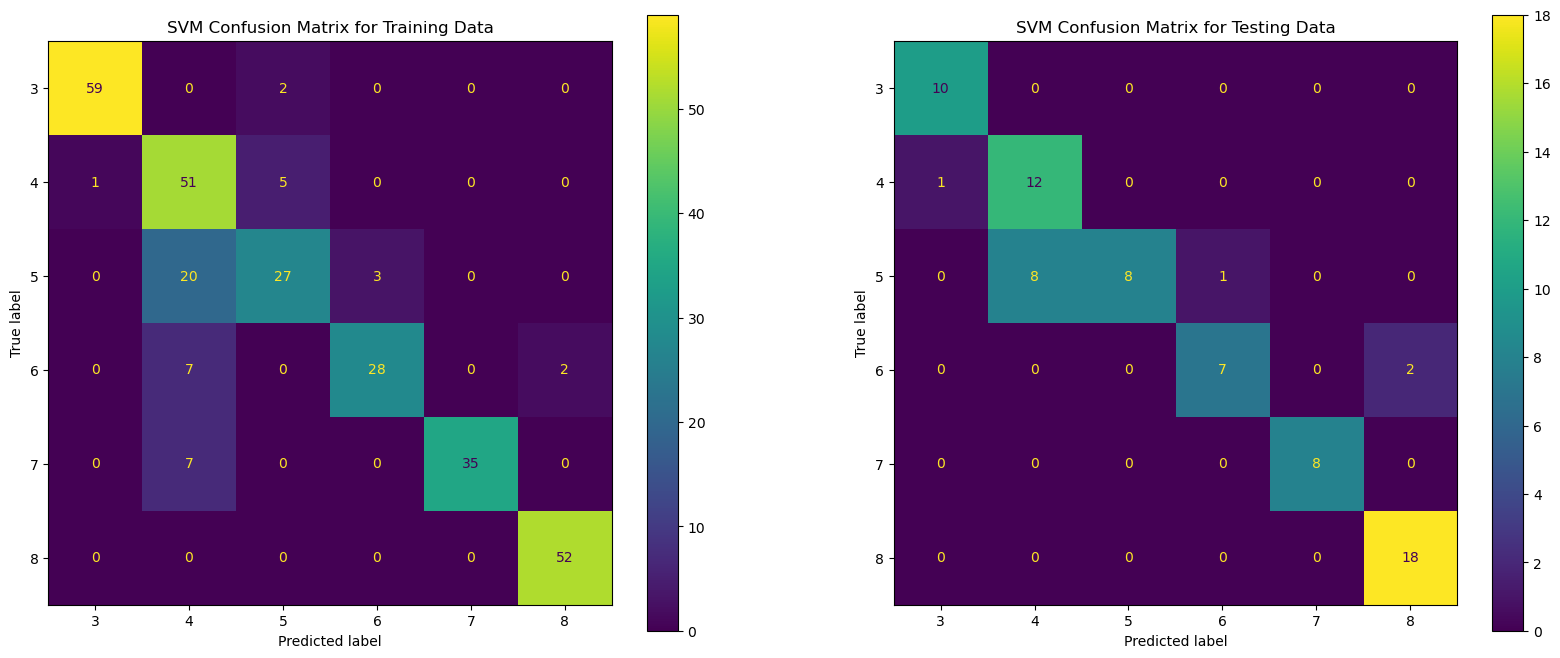

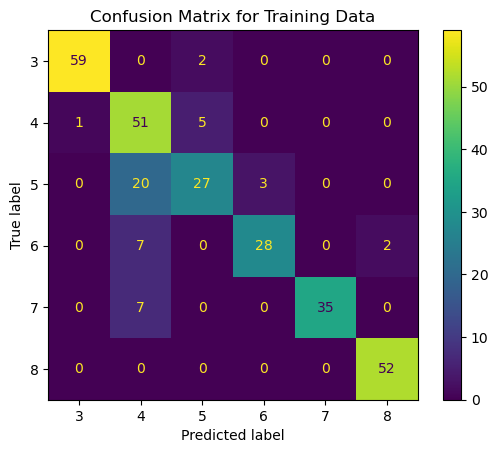

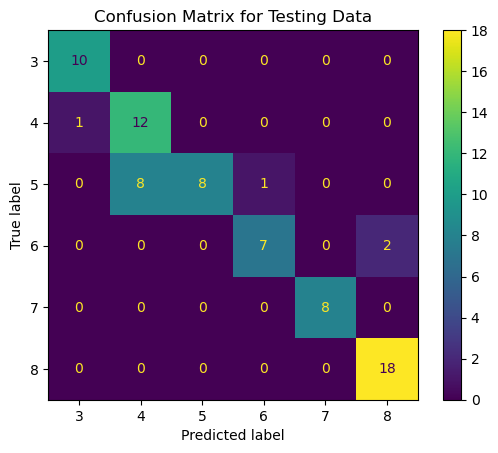

In [98]:
# creating a Support Vector Machine

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# creat Support Vector Machine model
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

# use SVM to predict on train and test sets
y_trainPredSVM = svm.predict(X_train)
y_testPredSVM = svm.predict(X_test)

# display accuracy for train and test sets
print('SVM Classification Train Report:\n',
      classification_report(y_train, y_trainPredSVM))
print(f'Accuracy Train: {accuracy_score(y_train, y_trainPredSVM)}\n')


print('SVM Classification Test Report:\n',
      classification_report(y_test, y_testPredSVM))
print(f'Accuracy Test: {accuracy_score(y_test, y_testPredSVM)}')

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredSVM, ax=axes[0])
disptrain.plot()
axes[0].set_title("SVM Confusion Matrix for Training Data")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredSVM, ax=axes[1])
disptest.plot()
axes[1].set_title("SVM Confusion Matrix for Testing Data")
plt.title("Confusion Matrix for Testing Data")
plt.show()

# def convert_to_stress_level(x):
#       conditions = [x==0, (x > 0) & (x < 4), (x >= 4) & (x <= 7), (x > 7)]
#       choices = ["No Stress", "Low Stress", "Medium Stress", "High Stress"]

#       return np.select(conditions, choices)

# y_trainPredSVM = convert_to_stress_level(y_trainPredSVM)
# y_testPredSVM = convert_to_stress_level(y_testPredSVM)

# # Create Frequency Bar Plot for each Stress Level
# val, count = np.unique(y_trainPredSVM, return_counts=True)
# print(f'Predicted Train Values: {val}\nCount: {count}\n')
# freqPlot = sns.barplot(x=val, y=count).set_title('Predicted Train Values')
# plt.xlabel('Predicted Train Values')
# plt.ylabel('Frequency')
# plt.show(freqPlot)

# val, count = np.unique(y_testPredSVM, return_counts=True)
# print(f'Predicted Test Values: {val}\nCount: {count}\n')
# freqPlot = sns.barplot(x=val, y=count).set_title('Predicted Test Values')
# plt.xlabel('Predicted Test Values')
# plt.ylabel('Frequency')
# plt.show(freqPlot)

In [99]:
import pickle

# save models
pickle.dump(lr, open('linear_regression_model.pkl', 'wb'))
pickle.dump(multi_logreg, open('multinomial_logistic_regression_model.pkl', 'wb'))
pickle.dump(gnb, open('naive_bayes_model.pkl', 'wb'))
pickle.dump(svm, open('support_vector_machine_model.pkl', 'wb'))